<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Analytics - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
import numpy as np
import missingno as msno
import plotly.express as px

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o nosso objetivo, que é fixar o conhecimento adquirido no treinamento de Regressão Linear.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Siga os passos propostos nos comentários acima de cada célular e bons estudos.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Leitura dos dados

Dataset está na pasta "Dados" com o nome "HousePrices_HalfMil.csv" em usa como separador ";".

In [2]:
dados = pd.read_csv('/content/HousePrices_HalfMil.csv', sep=';')

## Visualizar os dados

In [3]:
dados

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1
...,...,...,...,...,...,...,...
995,29150,48,1,5,4,0,0
996,43550,112,2,2,3,0,1
997,56575,185,3,4,4,0,1
998,56075,185,2,3,1,0,1


## Verificando o tamanho do dataset

In [4]:
# Olhando o tamanho da base
dados.shape

(1000, 7)

# Tratamento dos dados

* Analise:
 
 * A base não tem duplicados nem nulos

In [5]:
dados.duplicated().sum()

0

In [6]:
# Caso a base tivesse valores duplicados, esse código droparia eles
dados.drop_duplicates(inplace=True)

In [7]:
# Nossa base não tem dados nulos
dados.isnull().sum()

precos       0
area         0
garagem      0
banheiros    0
lareira      0
marmore      0
andares      0
dtype: int64

In [8]:
dados['precos'].median()

41725.0

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

* Análise:
* MÉDIA
 * Olhando o describe, vimos que a média de preços é de 41.985, a média da área dos imóveis é de 124 metros, média de garagem e de lareiras por imóveis de 2 e média de 3 banheiros por imóveis.

* DESVIO
 * O desvio de preço é de 12.000, o da área 72, a garagem tem um desvio de 0.81, banheiros e lareiras tem um desvio de 1.40 e mármore e andare um desvio de aproximadamente 0.50.

* MEDIANA
 * A mediana de preços é de 41.725, mediana da área de 123, garagem e lareiras uma mediana de 2, banheiros de 3 e marmore e andares por serem variáveis binarias tem uma mediana de 0.

In [10]:
dados.describe().round(2)

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41985.60,124.33,2.01,3.00,2.03,0.33,0.48
std,12140.39,72.39,0.81,1.43,1.42,0.47,0.50
min,13150.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,33112.50,60.75,1.00,2.00,1.00,0.00,0.00
50%,41725.00,123.00,2.00,3.00,2.00,0.00,0.00
75%,51175.00,187.00,3.00,4.00,3.00,1.00,1.00
max,73675.00,249.00,3.00,5.00,4.00,1.00,1.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

### Observe as correlações entre as variáveis:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Quais são mais correlacionadas com a variável dependete (Preço)?</li>
    <li>Qual o relacionamento entre elas (positivo ou negativo)?</li>
    <li>Existe correlação forte entre as variáveis explicativas?</li>
</ul>

* Análise:

 * As variáveis mais correlacionadas com preço são 'marmore' e 'andares'

 * O relacionamento entre elas é positivo de 43% e 63%

 * Não existe correlação forte positiva e nem negativa entre as variáveis explicativas

In [11]:
dados.corr().round(4)

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.0000,0.1177,0.1028,0.1244,0.1072,0.4308,0.6315
area,0.1177,1.0000,-0.0075,-0.0114,0.0121,-0.0153,-0.0180
garagem,0.1028,-0.0075,1.0000,0.0671,0.0605,-0.0156,-0.0206
banheiros,0.1244,-0.0114,0.0671,1.0000,0.0484,-0.0253,-0.0182
lareira,0.1072,0.0121,0.0605,0.0484,1.0000,0.0296,-0.0035
marmore,0.4308,-0.0153,-0.0156,-0.0253,0.0296,1.0000,-0.0065
andares,0.6315,-0.0180,-0.0206,-0.0182,-0.0035,-0.0065,1.0000


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

<img width='700px' src='../Dados/img/Box-Plot.png'>

## Importando biblioteca seaborn

In [12]:
import seaborn as sns

## Box plot da variável *dependente* (y)


### Avalie o comportamento da distribuição da variável dependente:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Parecem existir valores discrepantes (outliers)?</li>
    <li>O box plot apresenta alguma tendência?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

* Analise:

 * Não temos nenhum outlier

* LIMITE INFERIOR 
 * O limite inferior é de 13.150 e não temos nenhum valor abaixo disso.
 
* Q1 
 * O q1 está em 33.100, ou seja, 25% dos dados estão desse valor para baixo.
 
* MEDIANA 
 * A mediana é de 41.725 como a gente já tinha visto anteriormente no descibe.
 
* Q3 
 * O q3 é de 51.175, ou seja, 75% dos dados estão desse valor para baixo. 
 
* LIMITE SUPERIOR 
 * O limite superior é de 73.675 e não temos nenhum valor acima disso.

In [47]:
# Utilizando o px.box para conseguir ver mais detalhes dos quartis

fig = px.box(dados, y="precos")
fig.show()

## Investigando a variável *dependente* (y) juntamente com outras característica

Faça um box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

### Avalie o comportamento da distribuição da variável dependente com cada variável explicativa categórica:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>As estatísticas apresentam mudança significativa entre as categorias?</li>
    <li>O box plot apresenta alguma tendência bem definida?</li>
</ul>

### Box-plot (Preço X Garagem)

* Analise:

 * Cheguei a conclusão de que a quantidade de garagem não apresenta mundança significativa entre as categorias
 * Não tem uma tendência definida, as medianas estão praticamente no mesmo valor. Apenas com 3 garagens que sobe um pouco o preço, mais nada muito significante

<Axes: title={'center': 'Valor do imóvel'}, xlabel='Vagas na garagem', ylabel='Preço'>

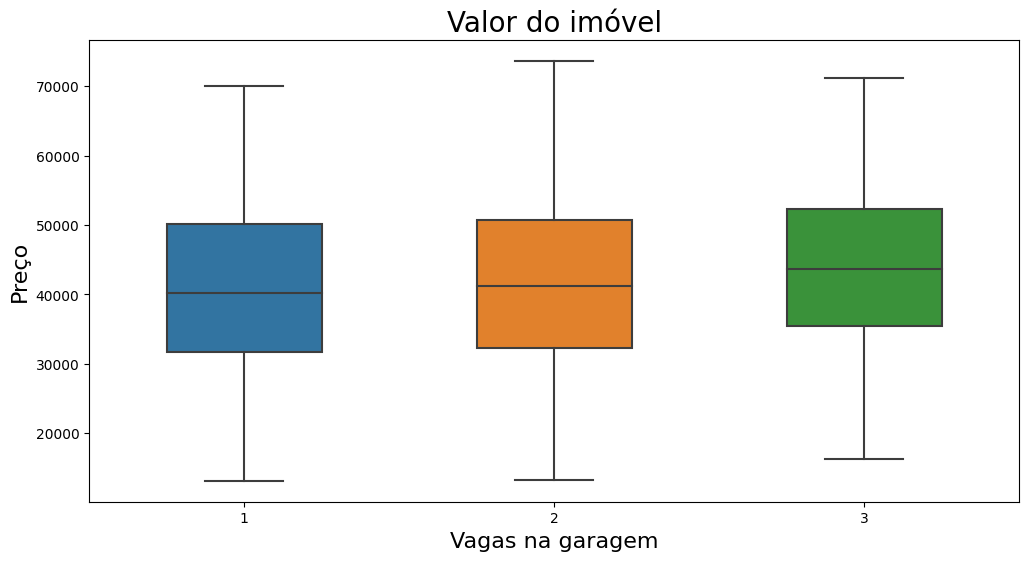

In [15]:
ax = sns.boxplot(y='precos', x='garagem', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Valor do imóvel', fontsize=20)
ax.set_ylabel('Preço', fontsize=16)
ax.set_xlabel('Vagas na garagem', fontsize=16)
ax

### Box-plot (Preço X Banheiros)

* Analise:

 * Os imóveis com 4 e 5 banheiros são significativamente mais caros do que o resto
 * Temos uma tendencia de que quanto mais banheiros mais caro o imóvel.

<Axes: title={'center': 'Valor do imóvel'}, xlabel='Quantidade de banheiros', ylabel='Preço'>

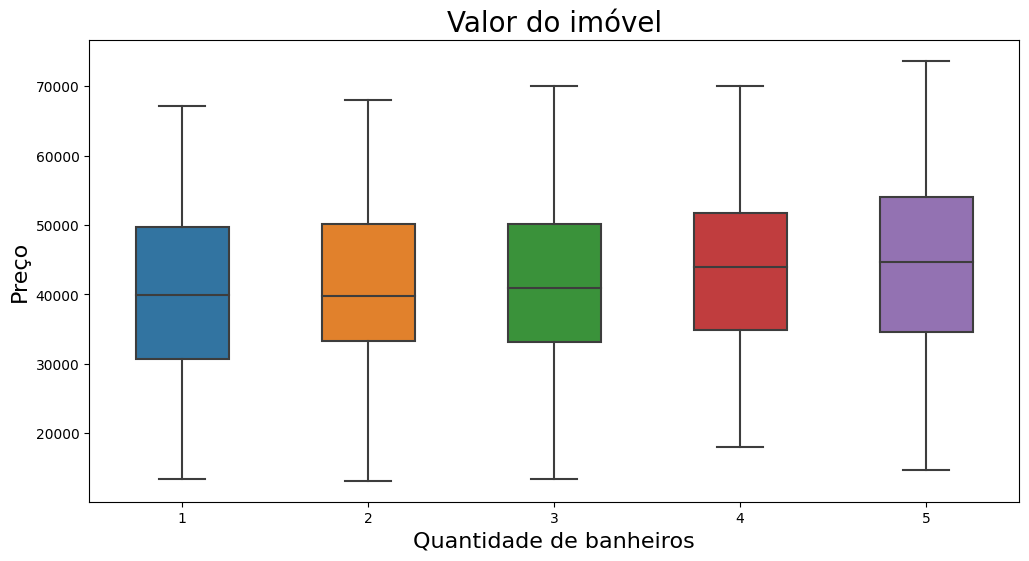

In [16]:
ax = sns.boxplot(y='precos', x='banheiros', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Valor do imóvel', fontsize=20)
ax.set_ylabel('Preço', fontsize=16)
ax.set_xlabel('Quantidade de banheiros', fontsize=16)
ax

### Box-plot (Preço X Lareira)

* Analise:
 * As categorias não tem uma mudança significativa.
 * Temos uma tendencia de quanto mais lareiras mais caro o imóvel, porém pouca coisa também

<Axes: title={'center': 'Valor do imóvel'}, xlabel='Quantidade de lareiras', ylabel='Preço'>

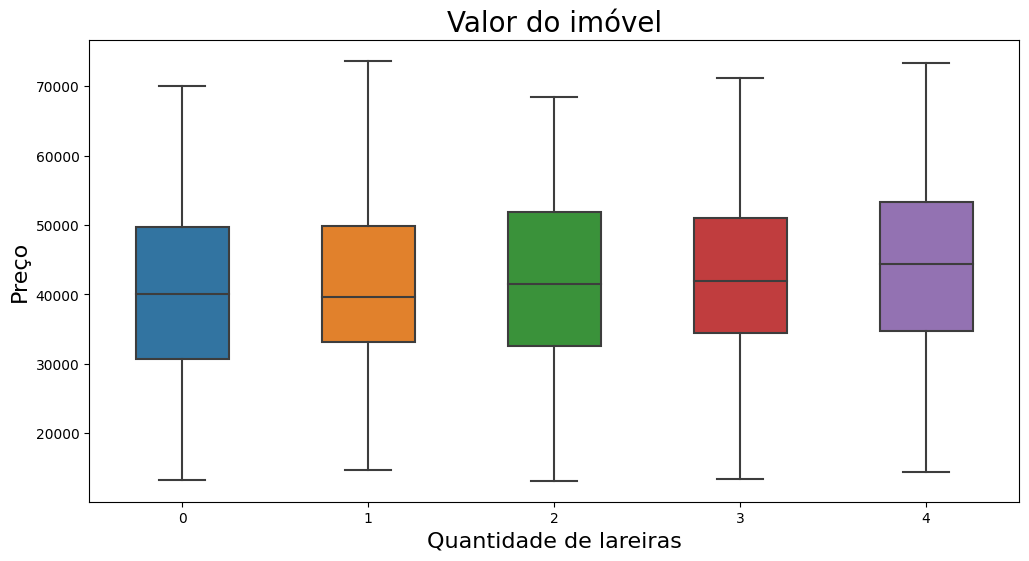

In [17]:
ax = sns.boxplot(y='precos', x='lareira', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Valor do imóvel', fontsize=20)
ax.set_ylabel('Preço', fontsize=16)
ax.set_xlabel('Quantidade de lareiras', fontsize=16)
ax

### Box-plot (Preço X Acabamento em Mármore)

* Analise:
 * Mármore é a segunda variável que mais se correlaciona com a variável Y, tendo isso em mente percebemos que as classes tem uma mudança significativa.
 * Temos uma tendencia bem grande de que quando o imóvel tem o acabamento em mármore, o preço sobe bastante.

<Axes: title={'center': 'Valor do imóvel'}, xlabel='marmore', ylabel='Preço'>

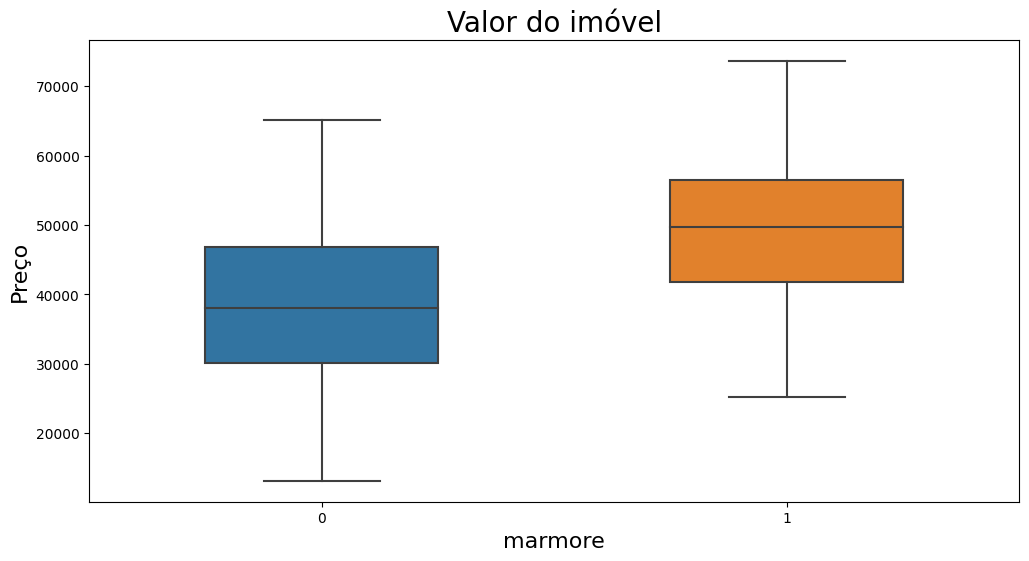

In [18]:
ax = sns.boxplot(y='precos', x='marmore', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Valor do imóvel', fontsize=20)
ax.set_ylabel('Preço', fontsize=16)
ax.set_xlabel('marmore', fontsize=16)
ax

### Box-plot (Preço X Andares)

* Analise:

 * Como essa é a variável que mais tem correlação com preço as classes mudam bastante.
 * Também temos uma tendencia bem alta de que quando o imóvel tem mais de um andar, o preço aumenta bastante.

<Axes: title={'center': 'Valor do imóvel'}, xlabel='andares', ylabel='Preço'>

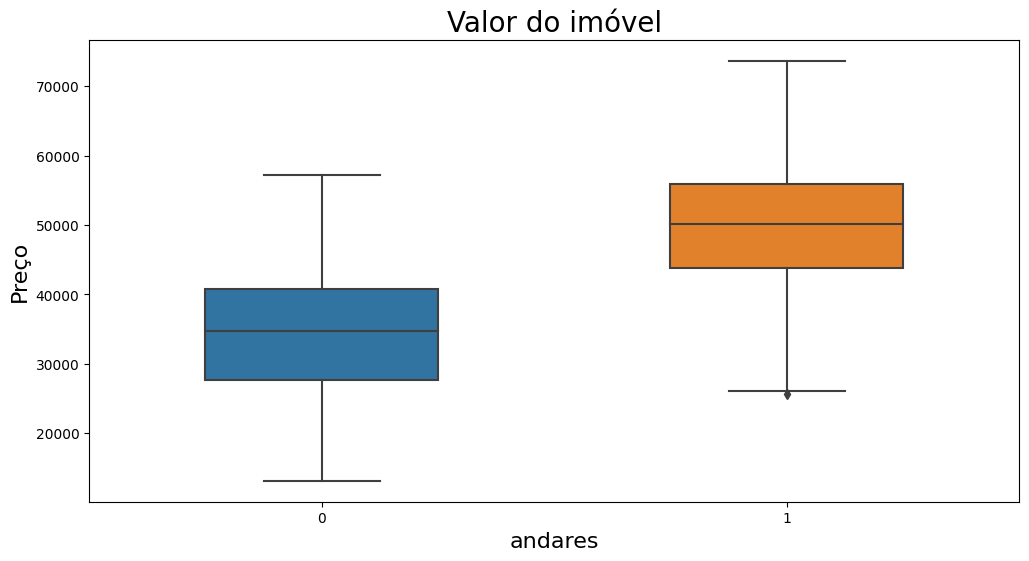

In [19]:
ax = sns.boxplot(y='precos', x='andares', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Valor do imóvel', fontsize=20)
ax.set_ylabel('Preço', fontsize=16)
ax.set_xlabel('andares', fontsize=16)
ax

## Distribuição de frequências da variável *dependente* (y)

Construa um histograma da variável dependente (Preço).

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>A distribuição de frequências da variável dependente parece ser assimétrica?</li>
    <li>É possível supor que a variável dependente segue uma distribuição normal?</li>
</ul>

* Analise:
 
 * Não. É uma distribuição simétrica
 * Sim, a variável y segue uma distribuição normal

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

<ipython-input-20-7694b311a986>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['precos'])


<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='precos', ylabel='Valor dod imóveis'>

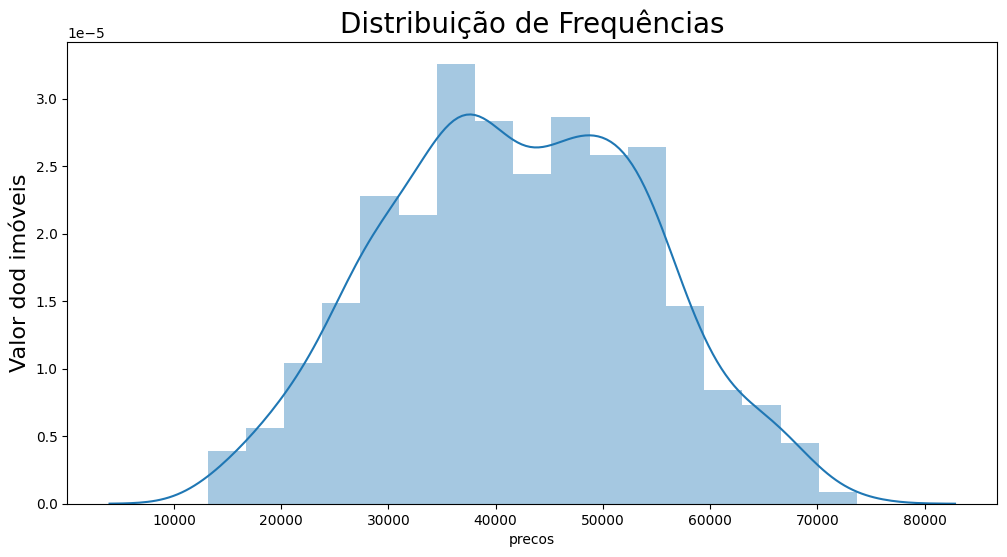

In [20]:
ax = sns.distplot(dados['precos'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Valor dod imóveis', fontsize=16)
ax

In [21]:
# np.log(dados.precos)

<Axes: >

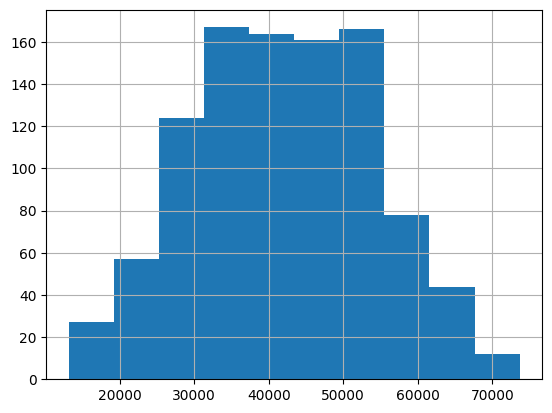

In [22]:
# Analisando o histograma abaixo percebemos que a maioria dos imóveis está entre 30.000 e 55.000

dados['precos'].hist()

## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Plote gráficos de dispersão da variável dependente contra cada variável explicativa. Utilize o pairplot da biblioteca seaborn para isso.

Plote o mesmo gráfico utilizando o parâmetro kind='reg'.

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>É possível identificar alguma relação linear entre as variáveis?</li>
    <li>A relação é positiva ou negativa?</li>
    <li>Compare com os resultados obtidos na matriz de correlação.</li>
</ul>

* Analise:

 * Esse não é o melhor gráfico para analisar nossas variáveis, por isso utilizamos o boxplot. Apenas 'precos' e 'area' são variáveis continuas e fica melhor de analisar, porem vimos que não existe nenhuma relação linear entre elas.

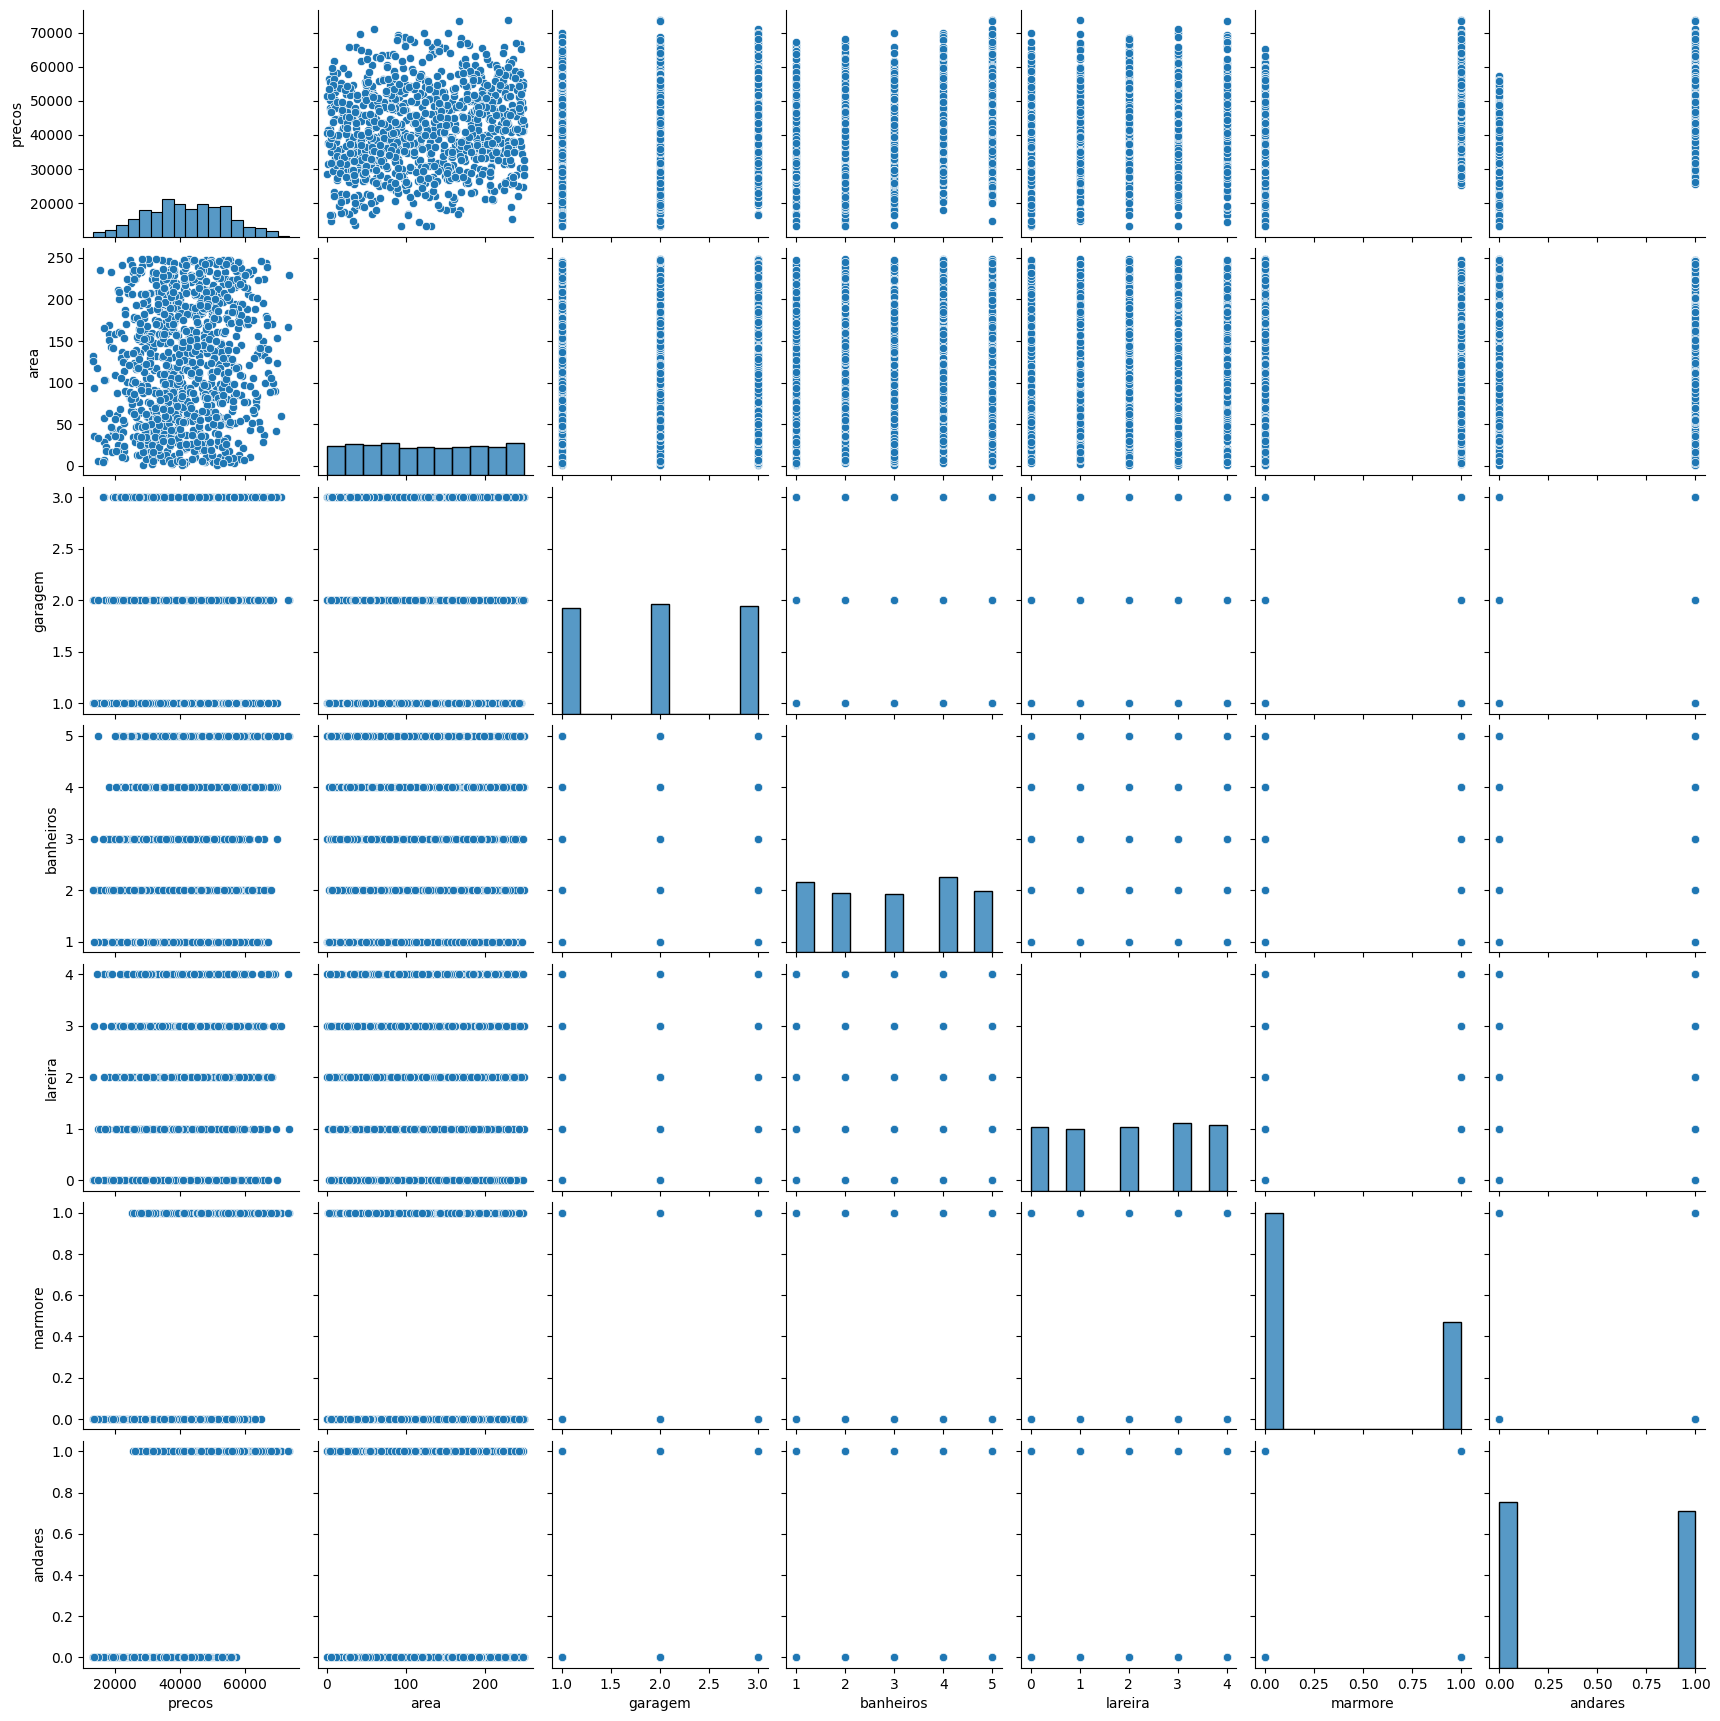

In [23]:
ax = sns.pairplot(dados)

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Criando uma Series (pandas) para armazenar a variável dependente (y)

In [25]:
# Definindo o preço como a variavel resposta

y = dados.precos

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [26]:
dados.columns

Index(['precos', 'area', 'garagem', 'banheiros', 'lareira', 'marmore',
       'andares'],
      dtype='object')

In [27]:
# Atribuindo ao x as variáveis de entrada
# Escolhemos essas variáveis porque com elas os modelos ficam melhores.

x = dados[['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares']]

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
# Usando o MinMaxScaler para normalizar as variáveis de entrada

padrao = MinMaxScaler()
x_pad = padrao.fit_transform(x)

## Criando os datasets de treino e de teste

In [30]:
# Definindo 30% dos dados para teste porque é um padrão do mercado

x_train, x_test, y_train, y_test = train_test_split(x_pad, y, test_size=0.3, random_state=5502)

In [31]:
# Confirmando o tanto de dados para treino e teste

print(x_train.shape)
print(x_test.shape)


(700, 6)
(300, 6)


## Instanciando a classe *LinearRegression()*

In [32]:
modelo = LinearRegression()

## Utilizando o método *fit()* para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [33]:
# Treinando o modelo

modelo.fit(x_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>O modelo apresenta um bom ajuste?</li>
    <li>Você lembra o que representa o R²?</li>
    <li>Qual medida podemos tomar para melhorar essa estatística?</li>
</ul>

* Sim, foi um bom ajuste

* R² mostra a porcentagem da variação da variável resposta. Mostra quanto o modelo está ajustado aos dados

* Análise exploratória

In [35]:
modelo.score(x_train, y_train).round(2)

0.64

## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [36]:
predlr = modelo.predict(x_train)

In [37]:
predlr_test = modelo.predict(x_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

# Score da regressão Linear

In [38]:
from sklearn.metrics import r2_score as r2

In [39]:
# Estou pegando o predict do x_test e o y_test e vendo se o modelo está bom utilizando o R².

r2(y_test, predlr_test)

0.6627916019016163

# <font color='red' style='font-size: 30px;'>Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## ESTIME O MODELO DECISIONTREE REGRESSOR 

LINK DA DOCUMENTAÇÃO: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

* Analise:

 * A profundidade que retorna o melhor score é a 4

In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [41]:
# Montamos um for para nos mostrar qual profundidade tem um melhor score, com R²

for profundidade in list (range(1,11)):
    
    model= DecisionTreeRegressor(max_depth=profundidade)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2_score = r2(y_test, y_pred).round(4)
    print('Profundudade: ', profundidade, 'r2_score: ', r2_score)

Profundudade:  1 r2_score:  0.406
Profundudade:  2 r2_score:  0.5909
Profundudade:  3 r2_score:  0.6091
Profundudade:  4 r2_score:  0.6147
Profundudade:  5 r2_score:  0.5903
Profundudade:  6 r2_score:  0.5532
Profundudade:  7 r2_score:  0.5035
Profundudade:  8 r2_score:  0.4462
Profundudade:  9 r2_score:  0.3828
Profundudade:  10 r2_score:  0.3227


In [42]:
# para confirmar o codigo de cima, fizemos com profundidade 4

model= DecisionTreeRegressor(max_depth=4)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2_score = r2(y_test, y_pred).round(4)

In [43]:
# pegando o predict de y e y_test rodamos o modelo com R², e confirmamos que uma profundidade 4 tem o melhor score

r2(y_test, y_pred)

0.6147053021410656

# KNN

* Analise

 * Depois de 13 vizinhos teve uma constancia melhor no score

In [44]:
# Um for para saber com quantos vizinhos o nosso modelo fica melhor

for vizinhos in list (range(1,21)):

    model = KNeighborsRegressor(n_neighbors=vizinhos)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2_score = r2(y_test, y_pred).round(4)
    print('vizinhos: ', vizinhos, 'r2_score: ', r2_score)

vizinhos:  1 r2_score:  0.3263
vizinhos:  2 r2_score:  0.4884
vizinhos:  3 r2_score:  0.5496
vizinhos:  4 r2_score:  0.5798
vizinhos:  5 r2_score:  0.6083
vizinhos:  6 r2_score:  0.6111
vizinhos:  7 r2_score:  0.601
vizinhos:  8 r2_score:  0.6053
vizinhos:  9 r2_score:  0.6142
vizinhos:  10 r2_score:  0.614
vizinhos:  11 r2_score:  0.6237
vizinhos:  12 r2_score:  0.6296
vizinhos:  13 r2_score:  0.6317
vizinhos:  14 r2_score:  0.6283
vizinhos:  15 r2_score:  0.6315
vizinhos:  16 r2_score:  0.6333
vizinhos:  17 r2_score:  0.6314
vizinhos:  18 r2_score:  0.6301
vizinhos:  19 r2_score:  0.6318
vizinhos:  20 r2_score:  0.6319


In [45]:
model = KNeighborsRegressor(n_neighbors=13)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2_score = r2(y_test, y_pred).round(4)

In [46]:
# pegando o predict de y e y_test rodamos o modelo com R²

r2(y_test, y_pred)

0.6316944296416752

# Conclusão

* Regressão linear: 66% de ajuste nos dados
* Arvore de decisão: 61% de ahuste nos dados
* KNN: 63% de ajuste nos dados

- Analisando os 3 modelos chegamos a conclusão de que a regressão linear tem o melhor ajuste com 66%, sendo então o melhor modelo.